# Tutorial on Bayesian Inference

In [10]:
import numpy as np
import matplotlib.pyplot as plt

## 1) Extragalactic radio sources

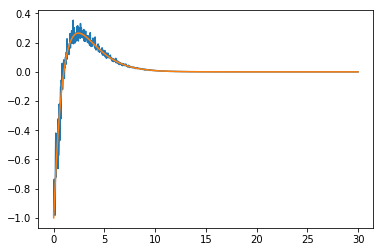

In [11]:
alpha = np.linspace(0, 30, 1000)
s0 = 1

posterior_alpha = (alpha-1)/(pow(2,alpha)*s0)
posterior_alpha_with_uncertainty = ((alpha+np.random.normal(0, 0.13, len(alpha)))-1)/ \
    (pow(2,(alpha+np.random.normal(0, 0.13, len(alpha)))*s0))

plt.plot(alpha, posterior_alpha_with_uncertainty)
plt.plot(alpha, posterior_alpha)

### Adding an uncertainty $\sigma$ will cause a missing data problem, as the data now depend on something else as well, which is omitted. 

## 2) Modelling and inferring stellar properties

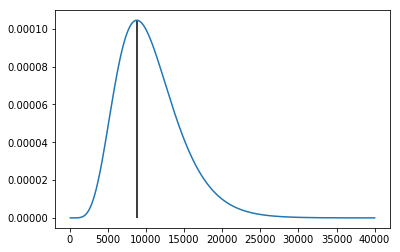

In [12]:
T0 = 10
sigma_T = 1
A = 1
L = np.linspace(100,40000, 10000)

P_L = (1/np.sqrt(2*np.pi*sigma_T**2))* \
    (np.exp((-0.5)*((L/(sigma_T*A))**(1/4) - T0)**2 / sigma_T**2))* \
    (1/4*(L/(sigma_T*A))**(-3/4))

plt.plot(L, P_L)
plt.vlines(L[np.where(P_L == max(P_L))], 0, max(P_L))

In [13]:
L[np.where(P_L == max(P_L))]

array([8819.02190219])

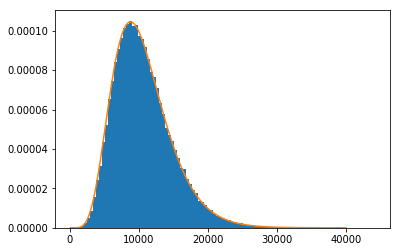

In [30]:
T = np.random.normal(T0, 1, 100000)
L_ = sigma_T * A * T**4
plt.hist(L_, bins=100, density=True)
plt.plot(L,P_L)

## 3) Satellites: the next generation

### $\mu_0$ and $\tau_0$ are hyperparameters in this case. 
### In Bayesian statistics, a hyperparameter is a parameter of a prior distribution; the term is used to distinguish them from parameters of the model for the underlying system under analysis.

### For example, if one is using a beta distribution to model the distribution of the parameter p of a Bernoulli distribution, then: p is a parameter of the underlying system (Bernoulli distribution), and α and β are parameters of the prior distribution (beta distribution), hence hyperparameters.

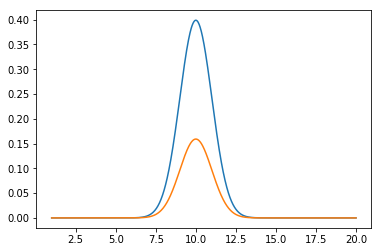

In [70]:
tau0 = 1
mu0 = 10
sigma = 1
theta = np.linspace(1, 20, 1000)
y = np.linspace(1,20,1000)

prior = (1/np.sqrt(2*np.pi*tau0**2)) * np.exp((-0.5)*((theta - mu0)**2 / tau0**2))

posterior = (1/(2*np.pi*sigma*tau0)) * np.exp((-0.5)*((y-theta)**2/(sigma**2)+(theta-mu0)**2)/(tau0**2))

plt.plot(theta, prior)
plt.plot(y, posterior)

In [28]:
y[np.where(posterior == max(posterior))]

array([9.995996])

In [29]:
theta[np.where(prior == max(prior))]

array([9.995996])

### If $\mu_0$ is many $\sigma$ away from y, then the prior and the sampling distribution will be discrepant. If $\tau_0$ $\ll$ $\sigma$, then the prior will be much narrower than the measurement uncertainty, i.e. here we have the limit of a highly informative prior.

significant bias, or systematic error